In [39]:
#Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils.class_weight import compute_class_weight

#Load Dataset
df = pd.read_csv("/content/loan_approval_dataset.csv")  # <-- Change path if needed
print("✅ File Loaded Successfully!")
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())

#Clean Column Names (remove leading/trailing spaces)
df.columns = df.columns.str.strip()

#Drop ID column safely
df = df.drop(columns=["loan_id"], errors='ignore')

#Clean and Encode Categorical Columns
label_encoder = LabelEncoder()
df["education"] = df["education"].str.strip().str.lower()
df["education"] = label_encoder.fit_transform(df["education"])

df["self_employed"] = df["self_employed"].str.strip().str.lower()
df["self_employed"] = label_encoder.fit_transform(df["self_employed"])

#Clean and Convert Target Column
df["loan_status"] = df["loan_status"].str.strip().str.lower()  # Normalize text
df["loan_status"] = df["loan_status"].map({"approved": 1, "rejected": 0})

# Remove any leftover invalid data
df = df.dropna(subset=["loan_status"])
df["loan_status"] = df["loan_status"].astype(int)

#Define Features & Target
X = df.drop("loan_status", axis=1)
y = df["loan_status"]

# Ensure y is integer
y = y.astype(int)

# Handle Class Imbalance
unique_classes = np.unique(y).astype(int)  # Ensure classes are integer
class_weights = compute_class_weight(class_weight='balanced', classes=unique_classes, y=y)
class_weight_dict = {unique_classes[i]: class_weights[i] for i in range(len(unique_classes))}

#Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 10. Train Model (RandomForest with Class Weights)
model = RandomForestClassifier(class_weight=class_weight_dict, random_state=42)
model.fit(X_train, y_train)

# 11. Predict & Evaluate
y_pred = model.predict(X_test)

print("\n Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


✅ File Loaded Successfully!
Shape: (4269, 13)
Columns: ['loan_id', ' no_of_dependents', ' education', ' self_employed', ' income_annum', ' loan_amount', ' loan_term', ' cibil_score', ' residential_assets_value', ' commercial_assets_value', ' luxury_assets_value', ' bank_asset_value', ' loan_status']

 Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.97       318
           1       0.98      0.99      0.98       536

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854

Confusion Matrix:
 [[307  11]
 [  7 529]]


In [40]:
# Bonus: Import SMOTE and Models
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

#  Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("Before SMOTE:", np.bincount(y_train))
print("After SMOTE: ", np.bincount(y_train_smote))

# Train Logistic Regression with SMOTE
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_smote, y_train_smote)
y_pred_log = log_reg.predict(X_test)

print("\n Logistic Regression Report:\n", classification_report(y_test, y_pred_log))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))

#  Train Decision Tree with SMOTE
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train_smote, y_train_smote)
y_pred_tree = decision_tree.predict(X_test)

print("\n Decision Tree Report:\n", classification_report(y_test, y_pred_tree))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_tree))


Before SMOTE: [1295 2120]
After SMOTE:  [2120 2120]

 Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.72      0.68      0.70       318
           1       0.82      0.85      0.83       536

    accuracy                           0.78       854
   macro avg       0.77      0.76      0.77       854
weighted avg       0.78      0.78      0.78       854

Confusion Matrix:
 [[217 101]
 [ 83 453]]

 Decision Tree Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96       318
           1       0.98      0.98      0.98       536

    accuracy                           0.97       854
   macro avg       0.97      0.97      0.97       854
weighted avg       0.97      0.97      0.97       854

Confusion Matrix:
 [[306  12]
 [ 13 523]]


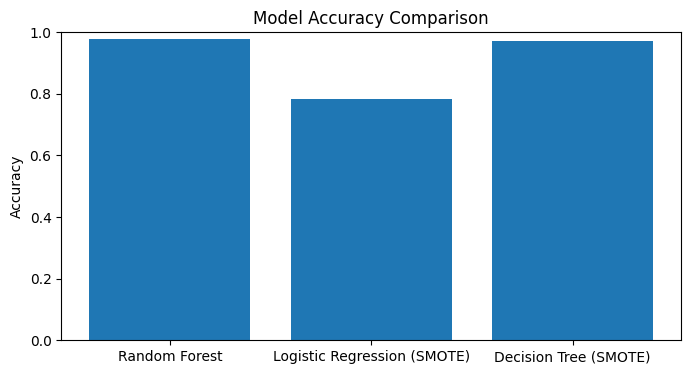

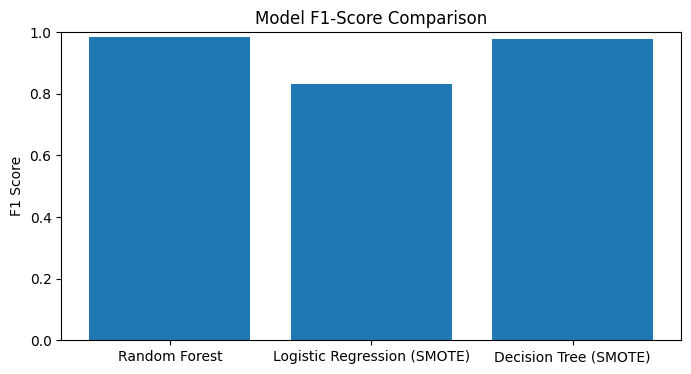

In [41]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score

#  Calculate Metrics
metrics = {
    "Random Forest": {
        "Accuracy": accuracy_score(y_test, y_pred),
        "F1-Score": f1_score(y_test, y_pred)
    },
    "Logistic Regression (SMOTE)": {
        "Accuracy": accuracy_score(y_test, y_pred_log),
        "F1-Score": f1_score(y_test, y_pred_log)
    },
    "Decision Tree (SMOTE)": {
        "Accuracy": accuracy_score(y_test, y_pred_tree),
        "F1-Score": f1_score(y_test, y_pred_tree)
    }
}

# Convert to Plottable Format
models = list(metrics.keys())
accuracy_scores = [metrics[m]["Accuracy"] for m in models]
f1_scores = [metrics[m]["F1-Score"] for m in models]

#  Plot Accuracy Comparison
plt.figure(figsize=(8,4))
plt.bar(models, accuracy_scores)
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0,1)
plt.show()

#  Plot F1 Score Comparison
plt.figure(figsize=(8,4))
plt.bar(models, f1_scores)
plt.title("Model F1-Score Comparison")
plt.ylabel("F1 Score")
plt.ylim(0,1)
plt.show()
